In [1]:
#Import the data set
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part 1 : Data Pre-processing

In [2]:
#Importing the training set
training_set = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_set = training_set.iloc[:,1:2].values

In [6]:
#Feature Scaling using Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [8]:
#Getting the inputs and outputs
#We excluded the last stock price because it doesnt have a (t+1)
#t
X_train = training_set[0:1257]
#t+1
y_train = training_set[1:1258]

In [11]:
#Reshaping
#The input format at keras has 3 dimensions, (batch_zize,timestep,input features used)
#timestep = the steps ahead we want to predict, Right now we are just taking account the last input for the next one
X_train = np.reshape(X_train,(1257,1,1))

## Part 2 - Building the RNN

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [13]:
#Instantialting the RNN
regressor = Sequential()

In [14]:
#Adding the input layer and the LSTM layer
#units = no of memory units
#input_shape = (no of timestep,no of features)
regressor.add(LSTM(units=4, activation = 'sigmoid', input_shape = (None,1)))

In [15]:
#Adding the output layer
#units = no of neurons at the output layer
regressor.add(Dense(units=1))

In [16]:
#Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
#Fitting the RNN
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 0s - loss: 5.5029e-04     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 4.9758e-04     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 4.5326e-04     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 4.1662e-04     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 3.8688e-04     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 3.6210e-04     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 3.4202e-04     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 3.2640e-04     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 3.1389e-04     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 3.0346e-04     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 2.9549e-04     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 2.888

1257/1257 [==============================] - 0s - loss: 2.5095e-04     
Epoch 97/200
1257/1257 [==============================] - 0s - loss: 2.5255e-04     
Epoch 98/200
1257/1257 [==============================] - 0s - loss: 2.5136e-04     
Epoch 99/200
1257/1257 [==============================] - 0s - loss: 2.5116e-04     
Epoch 100/200
1257/1257 [==============================] - 0s - loss: 2.4933e-04     
Epoch 101/200
1257/1257 [==============================] - 0s - loss: 2.5012e-04     
Epoch 102/200
1257/1257 [==============================] - 0s - loss: 2.5041e-04     
Epoch 103/200
1257/1257 [==============================] - 0s - loss: 2.5014e-04     
Epoch 104/200
1257/1257 [==============================] - 0s - loss: 2.5078e-04     
Epoch 105/200
1257/1257 [==============================] - 0s - loss: 2.5112e-04     
Epoch 106/200
1257/1257 [==============================] - 0s - loss: 2.5340e-04     
Epoch 107/200
1257/1257 [==============================] - 0s - loss: 2

1257/1257 [==============================] - 0s - loss: 2.4582e-04     
Epoch 192/200
1257/1257 [==============================] - 0s - loss: 2.5149e-04     
Epoch 193/200
1257/1257 [==============================] - 0s - loss: 2.4639e-04     
Epoch 194/200
1257/1257 [==============================] - 0s - loss: 2.4487e-04     
Epoch 195/200
1257/1257 [==============================] - 0s - loss: 2.5755e-04     
Epoch 196/200
1257/1257 [==============================] - 0s - loss: 2.5022e-04     
Epoch 197/200
1257/1257 [==============================] - 0s - loss: 2.5015e-04     
Epoch 198/200
1257/1257 [==============================] - 0s - loss: 2.4896e-04     
Epoch 199/200
1257/1257 [==============================] - 0s - loss: 2.4515e-04     
Epoch 200/200
1257/1257 [==============================] - 0s - loss: 2.4568e-04     


## Part 3 : Making predictions and visualizing

In [20]:
#Getting the test set
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

In [22]:
#Scaling the inputs with the same scale
inputs = real_stock_price
inputs = sc.transform(inputs)

In [24]:
#Reshape according to the format accepted by the predict method
inputs = np.reshape(inputs,(20,1,1))
#Make the prediction
predict_stock_price = regressor.predict(inputs)

In [25]:
#Get the unnormalized result
predicted_stock_price = sc.inverse_transform(predict_stock_price)

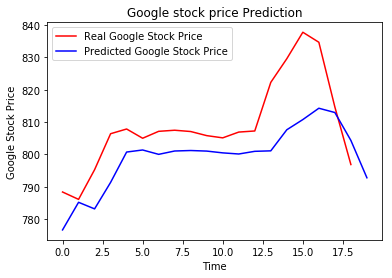

In [27]:
#Visualize the results
plt.plot(real_stock_price[1:], color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google stock price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Part 4 : Evaluate the results

In [35]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price[1:],predicted_stock_price[0:19]))

In [37]:
#To calculate MAPE
rmse/800

0.015635661858590725